In [250]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [251]:
df = pd.read_csv("/Users/joshualee/Documents/HAS/Stroke-Data/Stroke-Data.csv")

# Overall Dataset

In [252]:
df

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Y_lat,X_lon,Georeference
0,2020,FL,Florida,State,NVSS,Cardiovascular Diseases,Stroke Mortality,85.0,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Sex,Overall,Race/Ethnicity,Hispanic,T6,12,28.658800,-82.497000,POINT (-82.497 28.6588)
1,2020,GA,Georgia,State,NVSS,Cardiovascular Diseases,Stroke Mortality,NaN,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Insufficient Data,Sex,Male,Race/Ethnicity,More than one race,T6,13,32.654900,-83.454700,POINT (-83.4547 32.6549)
2,2020,IL,Illinois,State,NVSS,Cardiovascular Diseases,Stroke Mortality,53.6,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Sex,Female,Race/Ethnicity,Asian,T6,17,40.064400,-89.203400,POINT (-89.2034 40.0644)
3,2020,IN,Indiana,State,NVSS,Cardiovascular Diseases,Stroke Mortality,66.3,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Sex,Male,Race/Ethnicity,Asian,T6,18,39.912800,-86.275700,POINT (-86.2757 39.9128)
4,2020,MD,Maryland,State,NVSS,Cardiovascular Diseases,Stroke Mortality,NaN,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Insufficient Data,Sex,Male,Race/Ethnicity,More than one race,T6,24,39.064800,-76.820000,POINT (-76.82 39.0648)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78787,2020,TX,Bandera County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,Insufficient Data,Sex,Female,Race/Ethnicity,More than one race,T6,48019,29.755372,-99.260428,POINT (-99.26042835 29.75537155)
78788,2020,WI,Milwaukee County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,22.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Sex,Overall,Race/Ethnicity,American Indian or Alaska Native,T6,55079,43.008385,-87.956146,POINT (-87.95614619 43.0083854)
78789,2020,WI,Langlade County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,Insufficient Data,Sex,Female,Race/Ethnicity,Hispanic,T6,55067,45.263915,-89.065568,POINT (-89.06556822 45.26391515)
78790,2020,VA,Poquoson City,County,NVSS,Cardiovascular Diseases,Stroke Mortality,89.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Sex,Female,Race/Ethnicity,White,T6,51735,37.137821,-76.357899,POINT (-76.35789922 37.13782132)


In [253]:
df.columns.tolist()

['Year',
 'LocationAbbr',
 'LocationDesc',
 'GeographicLevel',
 'DataSource',
 'Class',
 'Topic',
 'Data_Value',
 'Data_Value_Unit',
 'Data_Value_Type',
 'Data_Value_Footnote_Symbol',
 'Data_Value_Footnote',
 'StratificationCategory1',
 'Stratification1',
 'StratificationCategory2',
 'Stratification2',
 'TopicID',
 'LocationID',
 'Y_lat',
 'X_lon',
 'Georeference']

In [254]:
df.shape

(78792, 21)

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78792 entries, 0 to 78791
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        78792 non-null  int64  
 1   LocationAbbr                78792 non-null  object 
 2   LocationDesc                78792 non-null  object 
 3   GeographicLevel             78792 non-null  object 
 4   DataSource                  78792 non-null  object 
 5   Class                       78792 non-null  object 
 6   Topic                       78792 non-null  object 
 7   Data_Value                  29213 non-null  float64
 8   Data_Value_Unit             78792 non-null  object 
 9   Data_Value_Type             78792 non-null  object 
 10  Data_Value_Footnote_Symbol  49579 non-null  object 
 11  Data_Value_Footnote         49579 non-null  object 
 12  StratificationCategory1     78792 non-null  object 
 13  Stratification1             787

In [256]:
df.isna().sum()

Year                              0
LocationAbbr                      0
LocationDesc                      0
GeographicLevel                   0
DataSource                        0
Class                             0
Topic                             0
Data_Value                    49579
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value_Footnote_Symbol    29213
Data_Value_Footnote           29213
StratificationCategory1           0
Stratification1                   0
StratificationCategory2           0
Stratification2                   0
TopicID                           0
LocationID                        0
Y_lat                            24
X_lon                            24
Georeference                     24
dtype: int64

# Cleaning Data_Value

In [257]:
df

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Y_lat,X_lon,Georeference
0,2020,FL,Florida,State,NVSS,Cardiovascular Diseases,Stroke Mortality,85.0,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Sex,Overall,Race/Ethnicity,Hispanic,T6,12,28.658800,-82.497000,POINT (-82.497 28.6588)
1,2020,GA,Georgia,State,NVSS,Cardiovascular Diseases,Stroke Mortality,NaN,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Insufficient Data,Sex,Male,Race/Ethnicity,More than one race,T6,13,32.654900,-83.454700,POINT (-83.4547 32.6549)
2,2020,IL,Illinois,State,NVSS,Cardiovascular Diseases,Stroke Mortality,53.6,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Sex,Female,Race/Ethnicity,Asian,T6,17,40.064400,-89.203400,POINT (-89.2034 40.0644)
3,2020,IN,Indiana,State,NVSS,Cardiovascular Diseases,Stroke Mortality,66.3,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Sex,Male,Race/Ethnicity,Asian,T6,18,39.912800,-86.275700,POINT (-86.2757 39.9128)
4,2020,MD,Maryland,State,NVSS,Cardiovascular Diseases,Stroke Mortality,NaN,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Insufficient Data,Sex,Male,Race/Ethnicity,More than one race,T6,24,39.064800,-76.820000,POINT (-76.82 39.0648)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78787,2020,TX,Bandera County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,Insufficient Data,Sex,Female,Race/Ethnicity,More than one race,T6,48019,29.755372,-99.260428,POINT (-99.26042835 29.75537155)
78788,2020,WI,Milwaukee County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,22.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Sex,Overall,Race/Ethnicity,American Indian or Alaska Native,T6,55079,43.008385,-87.956146,POINT (-87.95614619 43.0083854)
78789,2020,WI,Langlade County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,Insufficient Data,Sex,Female,Race/Ethnicity,Hispanic,T6,55067,45.263915,-89.065568,POINT (-89.06556822 45.26391515)
78790,2020,VA,Poquoson City,County,NVSS,Cardiovascular Diseases,Stroke Mortality,89.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Sex,Female,Race/Ethnicity,White,T6,51735,37.137821,-76.357899,POINT (-76.35789922 37.13782132)


In [258]:
df_value = df["Data_Value"].copy()
df_value

0        85.0
1         NaN
2        53.6
3        66.3
4         NaN
         ... 
78787     NaN
78788    22.2
78789     NaN
78790    89.2
78791    80.9
Name: Data_Value, Length: 78792, dtype: float64

In [259]:
df_value.dtypes

dtype('float64')

<Axes: >

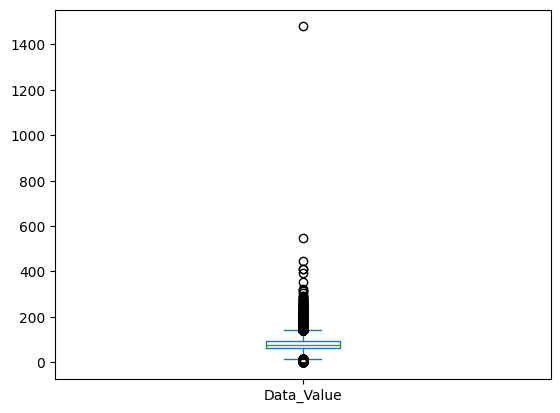

In [260]:
df_value.plot.box()

In [261]:
df_value.isna().sum()

np.int64(49579)

In [262]:
df_value.notna().sum()

np.int64(29213)

In [263]:
df_value.unique()

array([ 85. ,   nan,  53.6, ..., 549. , 213.8, 197.3], shape=(1855,))

In [264]:
df_value.fillna(df_value.mode()[0]).astype("float")

0        85.0
1        76.1
2        53.6
3        66.3
4        76.1
         ... 
78787    76.1
78788    22.2
78789    76.1
78790    89.2
78791    80.9
Name: Data_Value, Length: 78792, dtype: float64

In [265]:
df["Data_Value"] = df_value.fillna(df_value.mode()[0]).astype("float")

In [266]:
df

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Y_lat,X_lon,Georeference
0,2020,FL,Florida,State,NVSS,Cardiovascular Diseases,Stroke Mortality,85.0,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Sex,Overall,Race/Ethnicity,Hispanic,T6,12,28.658800,-82.497000,POINT (-82.497 28.6588)
1,2020,GA,Georgia,State,NVSS,Cardiovascular Diseases,Stroke Mortality,76.1,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Insufficient Data,Sex,Male,Race/Ethnicity,More than one race,T6,13,32.654900,-83.454700,POINT (-83.4547 32.6549)
2,2020,IL,Illinois,State,NVSS,Cardiovascular Diseases,Stroke Mortality,53.6,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Sex,Female,Race/Ethnicity,Asian,T6,17,40.064400,-89.203400,POINT (-89.2034 40.0644)
3,2020,IN,Indiana,State,NVSS,Cardiovascular Diseases,Stroke Mortality,66.3,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Sex,Male,Race/Ethnicity,Asian,T6,18,39.912800,-86.275700,POINT (-86.2757 39.9128)
4,2020,MD,Maryland,State,NVSS,Cardiovascular Diseases,Stroke Mortality,76.1,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Insufficient Data,Sex,Male,Race/Ethnicity,More than one race,T6,24,39.064800,-76.820000,POINT (-76.82 39.0648)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78787,2020,TX,Bandera County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,76.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,Insufficient Data,Sex,Female,Race/Ethnicity,More than one race,T6,48019,29.755372,-99.260428,POINT (-99.26042835 29.75537155)
78788,2020,WI,Milwaukee County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,22.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Sex,Overall,Race/Ethnicity,American Indian or Alaska Native,T6,55079,43.008385,-87.956146,POINT (-87.95614619 43.0083854)
78789,2020,WI,Langlade County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,76.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,Insufficient Data,Sex,Female,Race/Ethnicity,Hispanic,T6,55067,45.263915,-89.065568,POINT (-89.06556822 45.26391515)
78790,2020,VA,Poquoson City,County,NVSS,Cardiovascular Diseases,Stroke Mortality,89.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Sex,Female,Race/Ethnicity,White,T6,51735,37.137821,-76.357899,POINT (-76.35789922 37.13782132)


In [267]:
df.isna().sum()

Year                              0
LocationAbbr                      0
LocationDesc                      0
GeographicLevel                   0
DataSource                        0
Class                             0
Topic                             0
Data_Value                        0
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value_Footnote_Symbol    29213
Data_Value_Footnote           29213
StratificationCategory1           0
Stratification1                   0
StratificationCategory2           0
Stratification2                   0
TopicID                           0
LocationID                        0
Y_lat                            24
X_lon                            24
Georeference                     24
dtype: int64

# Cleaning Data_Value_Footnote_Symbol

In [268]:
df_symbol = df["Data_Value_Footnote_Symbol"].copy()
df_symbol

0        NaN
1          ~
2        NaN
3        NaN
4          ~
        ... 
78787      ~
78788    NaN
78789      ~
78790    NaN
78791    NaN
Name: Data_Value_Footnote_Symbol, Length: 78792, dtype: object

In [269]:
df_symbol.dtypes

dtype('O')

In [270]:
df_symbol.unique()

array([nan, '~'], dtype=object)

In [271]:
df_symbol.fillna("~").astype(object)

0        ~
1        ~
2        ~
3        ~
4        ~
        ..
78787    ~
78788    ~
78789    ~
78790    ~
78791    ~
Name: Data_Value_Footnote_Symbol, Length: 78792, dtype: object

In [272]:
df["Data_Value_Footnote_Symbol"] = df_symbol.fillna("~").astype(object)

In [273]:
df

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Y_lat,X_lon,Georeference
0,2020,FL,Florida,State,NVSS,Cardiovascular Diseases,Stroke Mortality,85.0,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Sex,Overall,Race/Ethnicity,Hispanic,T6,12,28.658800,-82.497000,POINT (-82.497 28.6588)
1,2020,GA,Georgia,State,NVSS,Cardiovascular Diseases,Stroke Mortality,76.1,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Insufficient Data,Sex,Male,Race/Ethnicity,More than one race,T6,13,32.654900,-83.454700,POINT (-83.4547 32.6549)
2,2020,IL,Illinois,State,NVSS,Cardiovascular Diseases,Stroke Mortality,53.6,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Sex,Female,Race/Ethnicity,Asian,T6,17,40.064400,-89.203400,POINT (-89.2034 40.0644)
3,2020,IN,Indiana,State,NVSS,Cardiovascular Diseases,Stroke Mortality,66.3,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Sex,Male,Race/Ethnicity,Asian,T6,18,39.912800,-86.275700,POINT (-86.2757 39.9128)
4,2020,MD,Maryland,State,NVSS,Cardiovascular Diseases,Stroke Mortality,76.1,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Insufficient Data,Sex,Male,Race/Ethnicity,More than one race,T6,24,39.064800,-76.820000,POINT (-76.82 39.0648)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78787,2020,TX,Bandera County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,76.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,Insufficient Data,Sex,Female,Race/Ethnicity,More than one race,T6,48019,29.755372,-99.260428,POINT (-99.26042835 29.75537155)
78788,2020,WI,Milwaukee County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,22.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Sex,Overall,Race/Ethnicity,American Indian or Alaska Native,T6,55079,43.008385,-87.956146,POINT (-87.95614619 43.0083854)
78789,2020,WI,Langlade County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,76.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,Insufficient Data,Sex,Female,Race/Ethnicity,Hispanic,T6,55067,45.263915,-89.065568,POINT (-89.06556822 45.26391515)
78790,2020,VA,Poquoson City,County,NVSS,Cardiovascular Diseases,Stroke Mortality,89.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Sex,Female,Race/Ethnicity,White,T6,51735,37.137821,-76.357899,POINT (-76.35789922 37.13782132)


In [274]:
df["Data_Value_Footnote_Symbol"]

0        ~
1        ~
2        ~
3        ~
4        ~
        ..
78787    ~
78788    ~
78789    ~
78790    ~
78791    ~
Name: Data_Value_Footnote_Symbol, Length: 78792, dtype: object

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78792 entries, 0 to 78791
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        78792 non-null  int64  
 1   LocationAbbr                78792 non-null  object 
 2   LocationDesc                78792 non-null  object 
 3   GeographicLevel             78792 non-null  object 
 4   DataSource                  78792 non-null  object 
 5   Class                       78792 non-null  object 
 6   Topic                       78792 non-null  object 
 7   Data_Value                  78792 non-null  float64
 8   Data_Value_Unit             78792 non-null  object 
 9   Data_Value_Type             78792 non-null  object 
 10  Data_Value_Footnote_Symbol  78792 non-null  object 
 11  Data_Value_Footnote         49579 non-null  object 
 12  StratificationCategory1     78792 non-null  object 
 13  Stratification1             787

In [276]:
df.isna().sum()

Year                              0
LocationAbbr                      0
LocationDesc                      0
GeographicLevel                   0
DataSource                        0
Class                             0
Topic                             0
Data_Value                        0
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value_Footnote_Symbol        0
Data_Value_Footnote           29213
StratificationCategory1           0
Stratification1                   0
StratificationCategory2           0
Stratification2                   0
TopicID                           0
LocationID                        0
Y_lat                            24
X_lon                            24
Georeference                     24
dtype: int64

# Cleaning Data_Value_Footnote

In [277]:
df

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Y_lat,X_lon,Georeference
0,2020,FL,Florida,State,NVSS,Cardiovascular Diseases,Stroke Mortality,85.0,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Sex,Overall,Race/Ethnicity,Hispanic,T6,12,28.658800,-82.497000,POINT (-82.497 28.6588)
1,2020,GA,Georgia,State,NVSS,Cardiovascular Diseases,Stroke Mortality,76.1,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Insufficient Data,Sex,Male,Race/Ethnicity,More than one race,T6,13,32.654900,-83.454700,POINT (-83.4547 32.6549)
2,2020,IL,Illinois,State,NVSS,Cardiovascular Diseases,Stroke Mortality,53.6,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Sex,Female,Race/Ethnicity,Asian,T6,17,40.064400,-89.203400,POINT (-89.2034 40.0644)
3,2020,IN,Indiana,State,NVSS,Cardiovascular Diseases,Stroke Mortality,66.3,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Sex,Male,Race/Ethnicity,Asian,T6,18,39.912800,-86.275700,POINT (-86.2757 39.9128)
4,2020,MD,Maryland,State,NVSS,Cardiovascular Diseases,Stroke Mortality,76.1,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Insufficient Data,Sex,Male,Race/Ethnicity,More than one race,T6,24,39.064800,-76.820000,POINT (-76.82 39.0648)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78787,2020,TX,Bandera County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,76.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,Insufficient Data,Sex,Female,Race/Ethnicity,More than one race,T6,48019,29.755372,-99.260428,POINT (-99.26042835 29.75537155)
78788,2020,WI,Milwaukee County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,22.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Sex,Overall,Race/Ethnicity,American Indian or Alaska Native,T6,55079,43.008385,-87.956146,POINT (-87.95614619 43.0083854)
78789,2020,WI,Langlade County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,76.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,Insufficient Data,Sex,Female,Race/Ethnicity,Hispanic,T6,55067,45.263915,-89.065568,POINT (-89.06556822 45.26391515)
78790,2020,VA,Poquoson City,County,NVSS,Cardiovascular Diseases,Stroke Mortality,89.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Sex,Female,Race/Ethnicity,White,T6,51735,37.137821,-76.357899,POINT (-76.35789922 37.13782132)


In [278]:
df_footnote = df["Data_Value_Footnote"].copy()
df_footnote

0                      NaN
1        Insufficient Data
2                      NaN
3                      NaN
4        Insufficient Data
               ...        
78787    Insufficient Data
78788                  NaN
78789    Insufficient Data
78790                  NaN
78791                  NaN
Name: Data_Value_Footnote, Length: 78792, dtype: object

In [279]:
df_footnote.unique()

array([nan, 'Insufficient Data'], dtype=object)

In [280]:
df_footnote.dtypes

dtype('O')

In [281]:
df_footnote.fillna("Sufficient Data").astype(object)

0          Sufficient Data
1        Insufficient Data
2          Sufficient Data
3          Sufficient Data
4        Insufficient Data
               ...        
78787    Insufficient Data
78788      Sufficient Data
78789    Insufficient Data
78790      Sufficient Data
78791      Sufficient Data
Name: Data_Value_Footnote, Length: 78792, dtype: object

In [282]:
df["Data_Value_Footnote"] = df_footnote.fillna("Sufficient Data").astype(object)

In [283]:
df

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Y_lat,X_lon,Georeference
0,2020,FL,Florida,State,NVSS,Cardiovascular Diseases,Stroke Mortality,85.0,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Overall,Race/Ethnicity,Hispanic,T6,12,28.658800,-82.497000,POINT (-82.497 28.6588)
1,2020,GA,Georgia,State,NVSS,Cardiovascular Diseases,Stroke Mortality,76.1,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Insufficient Data,Sex,Male,Race/Ethnicity,More than one race,T6,13,32.654900,-83.454700,POINT (-83.4547 32.6549)
2,2020,IL,Illinois,State,NVSS,Cardiovascular Diseases,Stroke Mortality,53.6,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Female,Race/Ethnicity,Asian,T6,17,40.064400,-89.203400,POINT (-89.2034 40.0644)
3,2020,IN,Indiana,State,NVSS,Cardiovascular Diseases,Stroke Mortality,66.3,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Male,Race/Ethnicity,Asian,T6,18,39.912800,-86.275700,POINT (-86.2757 39.9128)
4,2020,MD,Maryland,State,NVSS,Cardiovascular Diseases,Stroke Mortality,76.1,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Insufficient Data,Sex,Male,Race/Ethnicity,More than one race,T6,24,39.064800,-76.820000,POINT (-76.82 39.0648)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78787,2020,TX,Bandera County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,76.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,Insufficient Data,Sex,Female,Race/Ethnicity,More than one race,T6,48019,29.755372,-99.260428,POINT (-99.26042835 29.75537155)
78788,2020,WI,Milwaukee County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,22.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,Sufficient Data,Sex,Overall,Race/Ethnicity,American Indian or Alaska Native,T6,55079,43.008385,-87.956146,POINT (-87.95614619 43.0083854)
78789,2020,WI,Langlade County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,76.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,Insufficient Data,Sex,Female,Race/Ethnicity,Hispanic,T6,55067,45.263915,-89.065568,POINT (-89.06556822 45.26391515)
78790,2020,VA,Poquoson City,County,NVSS,Cardiovascular Diseases,Stroke Mortality,89.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,Sufficient Data,Sex,Female,Race/Ethnicity,White,T6,51735,37.137821,-76.357899,POINT (-76.35789922 37.13782132)


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78792 entries, 0 to 78791
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        78792 non-null  int64  
 1   LocationAbbr                78792 non-null  object 
 2   LocationDesc                78792 non-null  object 
 3   GeographicLevel             78792 non-null  object 
 4   DataSource                  78792 non-null  object 
 5   Class                       78792 non-null  object 
 6   Topic                       78792 non-null  object 
 7   Data_Value                  78792 non-null  float64
 8   Data_Value_Unit             78792 non-null  object 
 9   Data_Value_Type             78792 non-null  object 
 10  Data_Value_Footnote_Symbol  78792 non-null  object 
 11  Data_Value_Footnote         78792 non-null  object 
 12  StratificationCategory1     78792 non-null  object 
 13  Stratification1             787

In [285]:
df.isna().sum()

Year                           0
LocationAbbr                   0
LocationDesc                   0
GeographicLevel                0
DataSource                     0
Class                          0
Topic                          0
Data_Value                     0
Data_Value_Unit                0
Data_Value_Type                0
Data_Value_Footnote_Symbol     0
Data_Value_Footnote            0
StratificationCategory1        0
Stratification1                0
StratificationCategory2        0
Stratification2                0
TopicID                        0
LocationID                     0
Y_lat                         24
X_lon                         24
Georeference                  24
dtype: int64

# Cleaning Y_lat & X_lon

In [286]:
df_lat = df["Y_lat"].copy()


In [287]:
df_lat.dtypes

dtype('float64')

In [288]:
df[df["Y_lat"].isna()]

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Y_lat,X_lon,Georeference
69369,2020,US,United States,Nation,NVSS,Cardiovascular Diseases,Stroke Mortality,93.5,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Male,Race/Ethnicity,Native Hawaiian or Other Pacific Islander,T6,0,NaN,NaN,NaN
69530,2020,US,United States,Nation,NVSS,Cardiovascular Diseases,Stroke Mortality,73.5,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Female,Race/Ethnicity,Overall,T6,0,NaN,NaN,NaN
69728,2020,US,United States,Nation,NVSS,Cardiovascular Diseases,Stroke Mortality,62.1,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Male,Race/Ethnicity,American Indian or Alaska Native,T6,0,NaN,NaN,NaN
69931,2020,US,United States,Nation,NVSS,Cardiovascular Diseases,Stroke Mortality,37.8,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Female,Race/Ethnicity,More than one race,T6,0,NaN,NaN,NaN
70151,2020,US,United States,Nation,NVSS,Cardiovascular Diseases,Stroke Mortality,110.3,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Overall,Race/Ethnicity,Black,T6,0,NaN,NaN,NaN
70970,2020,US,United States,Nation,NVSS,Cardiovascular Diseases,Stroke Mortality,77.0,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Male,Race/Ethnicity,Overall,T6,0,NaN,NaN,NaN
71470,2020,US,United States,Nation,NVSS,Cardiovascular Diseases,Stroke Mortality,65.9,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Female,Race/Ethnicity,American Indian or Alaska Native,T6,0,NaN,NaN,NaN
72101,2020,US,United States,Nation,NVSS,Cardiovascular Diseases,Stroke Mortality,93.8,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Overall,Race/Ethnicity,Native Hawaiian or Other Pacific Islander,T6,0,NaN,NaN,NaN
72713,2020,US,United States,Nation,NVSS,Cardiovascular Diseases,Stroke Mortality,35.3,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Male,Race/Ethnicity,More than one race,T6,0,NaN,NaN,NaN
72750,2020,US,United States,Nation,NVSS,Cardiovascular Diseases,Stroke Mortality,100.8,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Female,Race/Ethnicity,Black,T6,0,NaN,NaN,NaN


In [289]:
df[df["X_lon"].isna()]

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Y_lat,X_lon,Georeference
69369,2020,US,United States,Nation,NVSS,Cardiovascular Diseases,Stroke Mortality,93.5,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Male,Race/Ethnicity,Native Hawaiian or Other Pacific Islander,T6,0,NaN,NaN,NaN
69530,2020,US,United States,Nation,NVSS,Cardiovascular Diseases,Stroke Mortality,73.5,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Female,Race/Ethnicity,Overall,T6,0,NaN,NaN,NaN
69728,2020,US,United States,Nation,NVSS,Cardiovascular Diseases,Stroke Mortality,62.1,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Male,Race/Ethnicity,American Indian or Alaska Native,T6,0,NaN,NaN,NaN
69931,2020,US,United States,Nation,NVSS,Cardiovascular Diseases,Stroke Mortality,37.8,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Female,Race/Ethnicity,More than one race,T6,0,NaN,NaN,NaN
70151,2020,US,United States,Nation,NVSS,Cardiovascular Diseases,Stroke Mortality,110.3,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Overall,Race/Ethnicity,Black,T6,0,NaN,NaN,NaN
70970,2020,US,United States,Nation,NVSS,Cardiovascular Diseases,Stroke Mortality,77.0,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Male,Race/Ethnicity,Overall,T6,0,NaN,NaN,NaN
71470,2020,US,United States,Nation,NVSS,Cardiovascular Diseases,Stroke Mortality,65.9,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Female,Race/Ethnicity,American Indian or Alaska Native,T6,0,NaN,NaN,NaN
72101,2020,US,United States,Nation,NVSS,Cardiovascular Diseases,Stroke Mortality,93.8,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Overall,Race/Ethnicity,Native Hawaiian or Other Pacific Islander,T6,0,NaN,NaN,NaN
72713,2020,US,United States,Nation,NVSS,Cardiovascular Diseases,Stroke Mortality,35.3,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Male,Race/Ethnicity,More than one race,T6,0,NaN,NaN,NaN
72750,2020,US,United States,Nation,NVSS,Cardiovascular Diseases,Stroke Mortality,100.8,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Female,Race/Ethnicity,Black,T6,0,NaN,NaN,NaN


In [290]:
df.columns.tolist()

['Year',
 'LocationAbbr',
 'LocationDesc',
 'GeographicLevel',
 'DataSource',
 'Class',
 'Topic',
 'Data_Value',
 'Data_Value_Unit',
 'Data_Value_Type',
 'Data_Value_Footnote_Symbol',
 'Data_Value_Footnote',
 'StratificationCategory1',
 'Stratification1',
 'StratificationCategory2',
 'Stratification2',
 'TopicID',
 'LocationID',
 'Y_lat',
 'X_lon',
 'Georeference']

In [291]:
df["LocationID"].unique()

array([   12,    13,    17, ..., 54009, 55057, 55067], shape=(3283,))

In [296]:
df = df.dropna()
df

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Y_lat,X_lon,Georeference
0,2020,FL,Florida,State,NVSS,Cardiovascular Diseases,Stroke Mortality,85.0,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Overall,Race/Ethnicity,Hispanic,T6,12,28.658800,-82.497000,POINT (-82.497 28.6588)
1,2020,GA,Georgia,State,NVSS,Cardiovascular Diseases,Stroke Mortality,76.1,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Insufficient Data,Sex,Male,Race/Ethnicity,More than one race,T6,13,32.654900,-83.454700,POINT (-83.4547 32.6549)
2,2020,IL,Illinois,State,NVSS,Cardiovascular Diseases,Stroke Mortality,53.6,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Female,Race/Ethnicity,Asian,T6,17,40.064400,-89.203400,POINT (-89.2034 40.0644)
3,2020,IN,Indiana,State,NVSS,Cardiovascular Diseases,Stroke Mortality,66.3,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Sufficient Data,Sex,Male,Race/Ethnicity,Asian,T6,18,39.912800,-86.275700,POINT (-86.2757 39.9128)
4,2020,MD,Maryland,State,NVSS,Cardiovascular Diseases,Stroke Mortality,76.1,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,Insufficient Data,Sex,Male,Race/Ethnicity,More than one race,T6,24,39.064800,-76.820000,POINT (-76.82 39.0648)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78787,2020,TX,Bandera County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,76.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,Insufficient Data,Sex,Female,Race/Ethnicity,More than one race,T6,48019,29.755372,-99.260428,POINT (-99.26042835 29.75537155)
78788,2020,WI,Milwaukee County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,22.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,Sufficient Data,Sex,Overall,Race/Ethnicity,American Indian or Alaska Native,T6,55079,43.008385,-87.956146,POINT (-87.95614619 43.0083854)
78789,2020,WI,Langlade County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,76.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,Insufficient Data,Sex,Female,Race/Ethnicity,Hispanic,T6,55067,45.263915,-89.065568,POINT (-89.06556822 45.26391515)
78790,2020,VA,Poquoson City,County,NVSS,Cardiovascular Diseases,Stroke Mortality,89.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,Sufficient Data,Sex,Female,Race/Ethnicity,White,T6,51735,37.137821,-76.357899,POINT (-76.35789922 37.13782132)


In [295]:
df.isna().sum()

Year                          0
LocationAbbr                  0
LocationDesc                  0
GeographicLevel               0
DataSource                    0
Class                         0
Topic                         0
Data_Value                    0
Data_Value_Unit               0
Data_Value_Type               0
Data_Value_Footnote_Symbol    0
Data_Value_Footnote           0
StratificationCategory1       0
Stratification1               0
StratificationCategory2       0
Stratification2               0
TopicID                       0
LocationID                    0
Y_lat                         0
X_lon                         0
Georeference                  0
dtype: int64